# House Prices

## Is Wood deck squarefeet significant to predict the salesprice of the house?

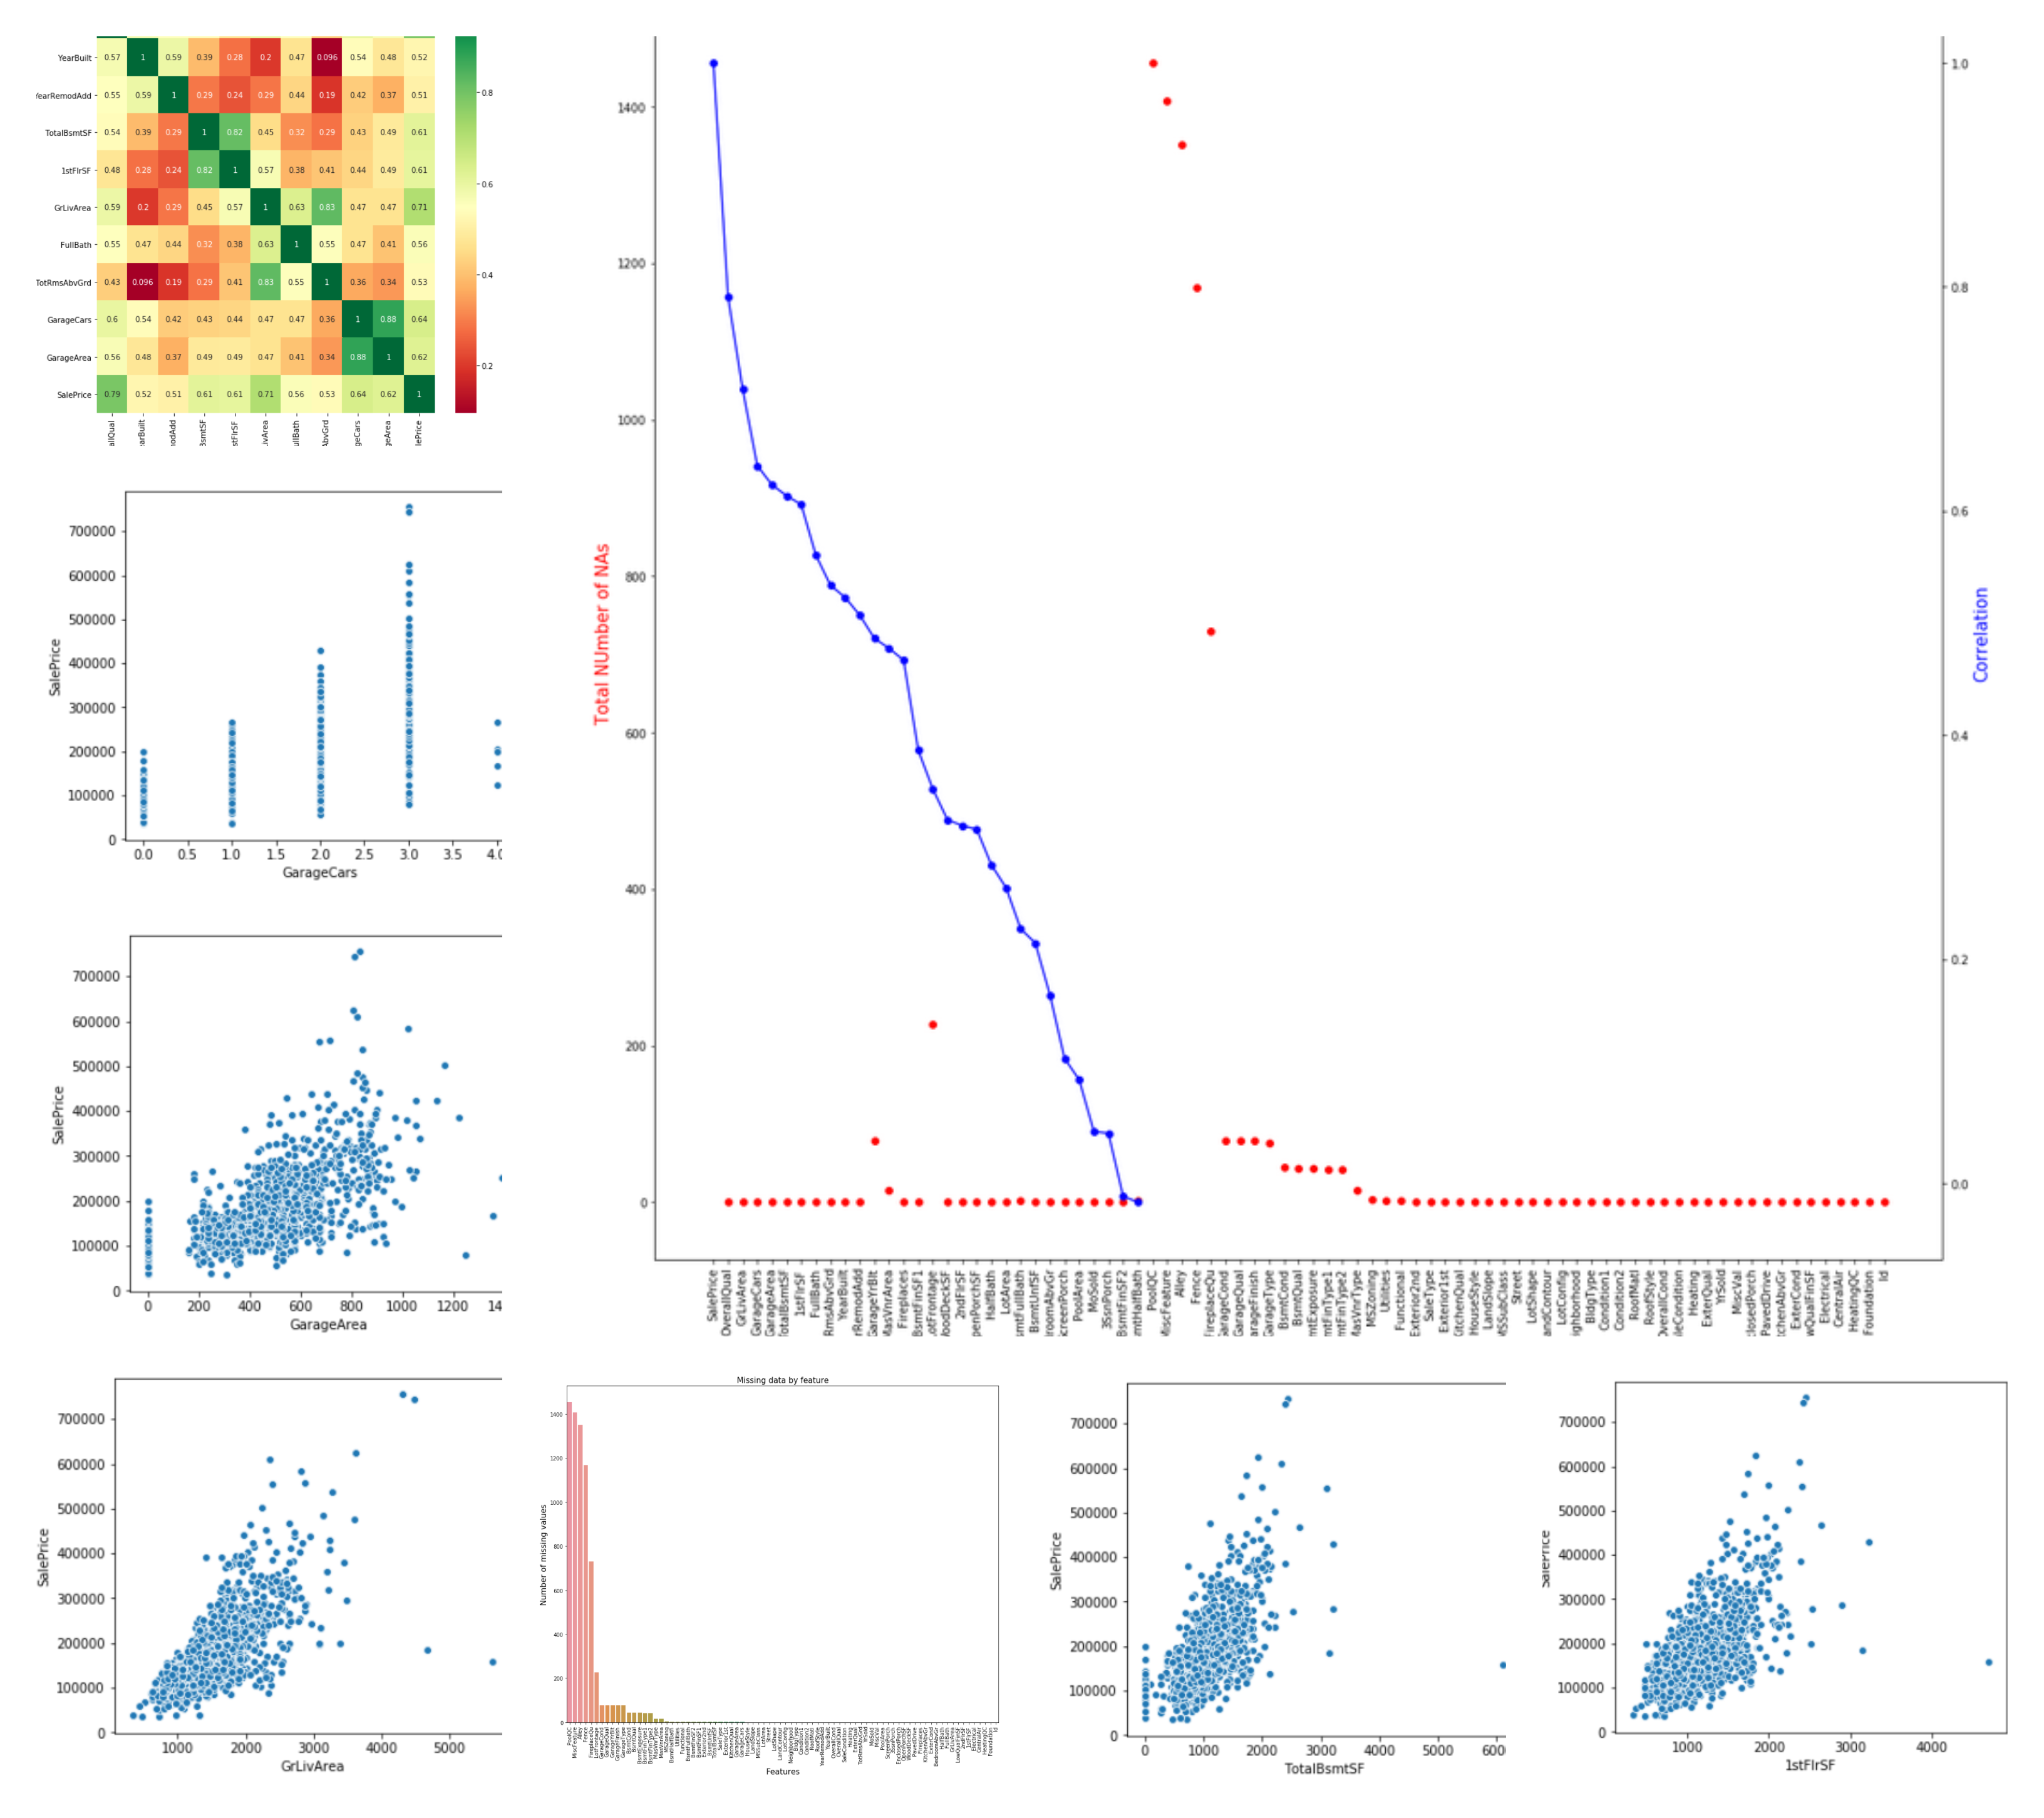

### 1) Introduction
    Import Libraries
    Load data
    Correlation with target variable
    Plotting correlation vs # of NAs

### 2) Missing values imputation
    Figure out missing value columns
    Fill out missing values

### 3) Variable Transformation
    Changing non-numbers to numbers


In [102]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

In [103]:
from subprocess import check_output
print(check_output(["ls", "/home/hasan/Desktop/house-prices/input/"]).decode("utf8"))
train = pd.read_csv('../house-prices/input/train.csv')
test = pd.read_csv('../house-prices/input/test.csv')

data_description.txt
sample_submission.csv
test.csv
train.csv



In [104]:
def trainSumm():
    print("Train dataset:\n(Rows,Columns)")
    print(" ",train.shape)
    return((train.head(10)))

def testSumm():
    print("Test dataset:\n(Rows,Columns)")
    print(" ",test.shape)
    return((test.head(10)))

## Visualizing Data

In [105]:
trainSumm()

Train dataset:
(Rows,Columns)
  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [106]:
testSumm()

Test dataset:
(Rows,Columns)
  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [107]:
tr = list(train.columns.values)
ts = list(test.columns.values)

def missingFeature(list1, list2): 
    return (list(set(list1) - set(list2))) 

print(missingFeature(tr, ts))

['SalePrice']


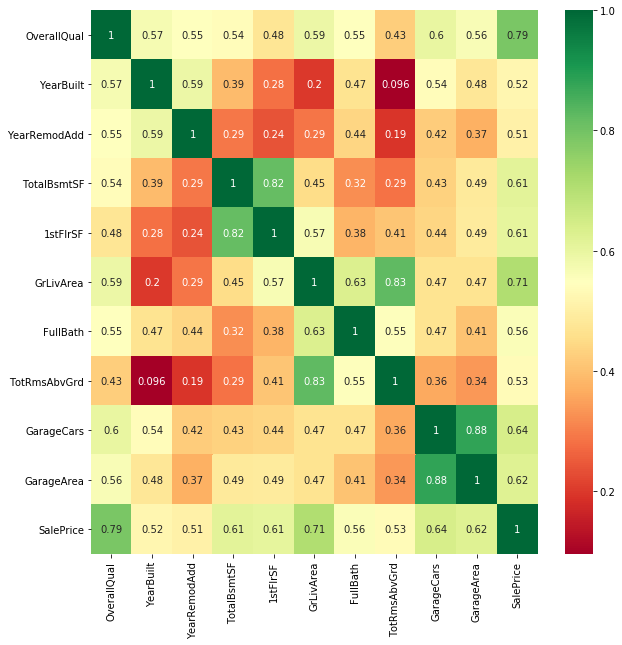

In [108]:
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [109]:
Num=corrmat['SalePrice'].sort_values(ascending=False).head(30).to_frame()

Num

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


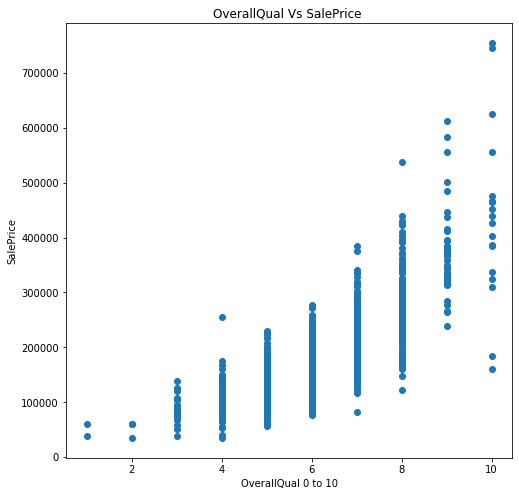

In [110]:
plt.scatter(train["OverallQual"],train["SalePrice"])
plt.title("OverallQual Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("OverallQual 0 to 10");
plt.gcf().set_size_inches((8, 8)) 

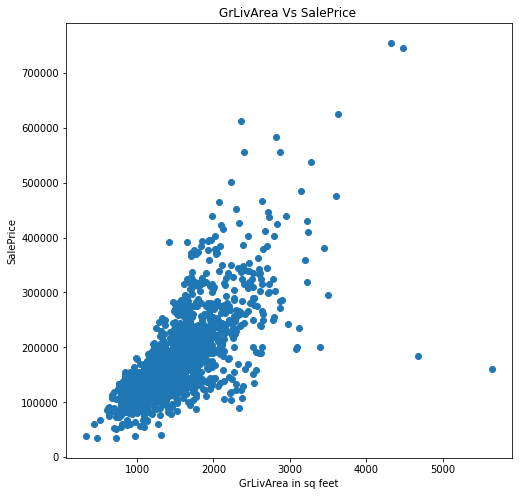

In [111]:
plt.scatter(train["GrLivArea"],train["SalePrice"])
plt.title("GrLivArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea in sq feet");
plt.gcf().set_size_inches((8, 8)) 

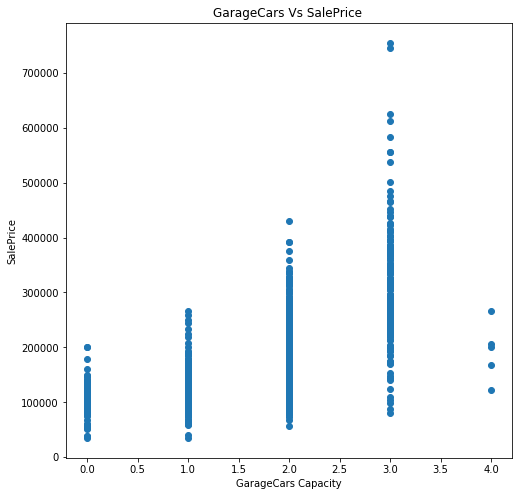

In [112]:
plt.scatter(train["GarageCars"],train["SalePrice"])
plt.title("GarageCars Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("GarageCars Capacity");
plt.gcf().set_size_inches((8, 8)) 

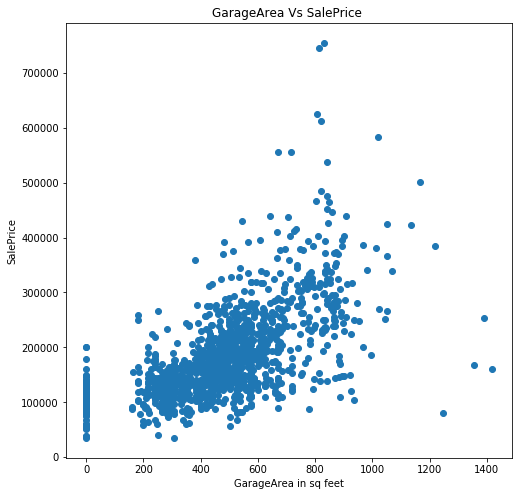

In [113]:
plt.scatter(train["GarageArea"],train["SalePrice"])
plt.title("GarageArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("GarageArea in sq feet");
plt.gcf().set_size_inches((8, 8)) 

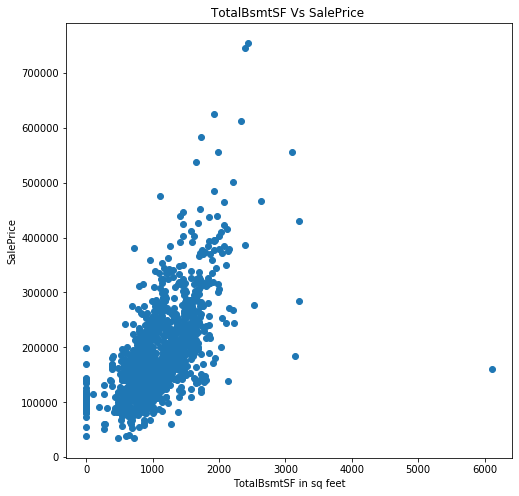

In [114]:
plt.scatter(train["TotalBsmtSF"],train["SalePrice"])
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("TotalBsmtSF in sq feet");
plt.gcf().set_size_inches((8, 8)) 

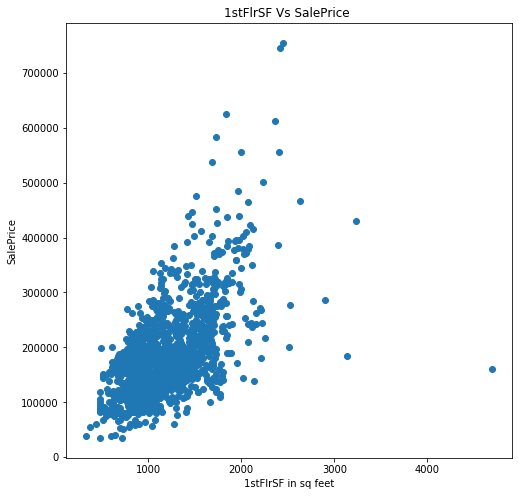

In [115]:
plt.scatter(train["1stFlrSF"],train["SalePrice"])
plt.title("1stFlrSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("1stFlrSF in sq feet");
plt.gcf().set_size_inches((8, 8)) 

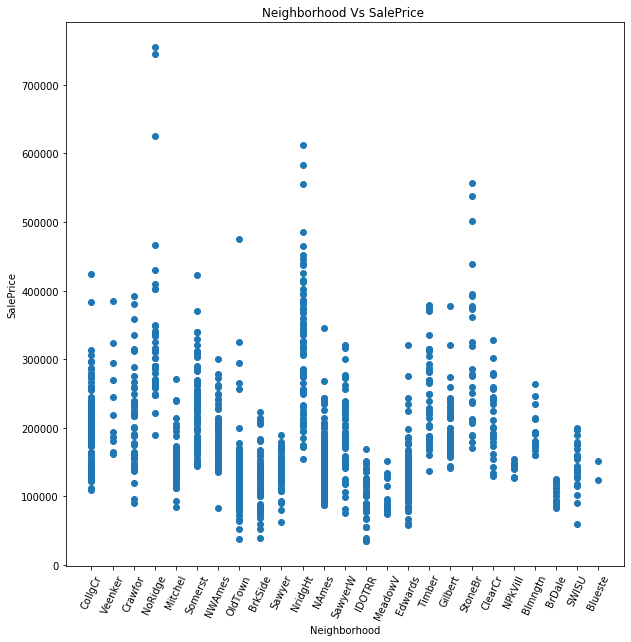

In [116]:
plt.scatter(train["Neighborhood"],train["SalePrice"])
plt.title("Neighborhood Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Neighborhood");
plt.xticks(rotation='65')
plt.gcf().set_size_inches((10, 10)) 

## Missing data by feature and feature correlation to sale price

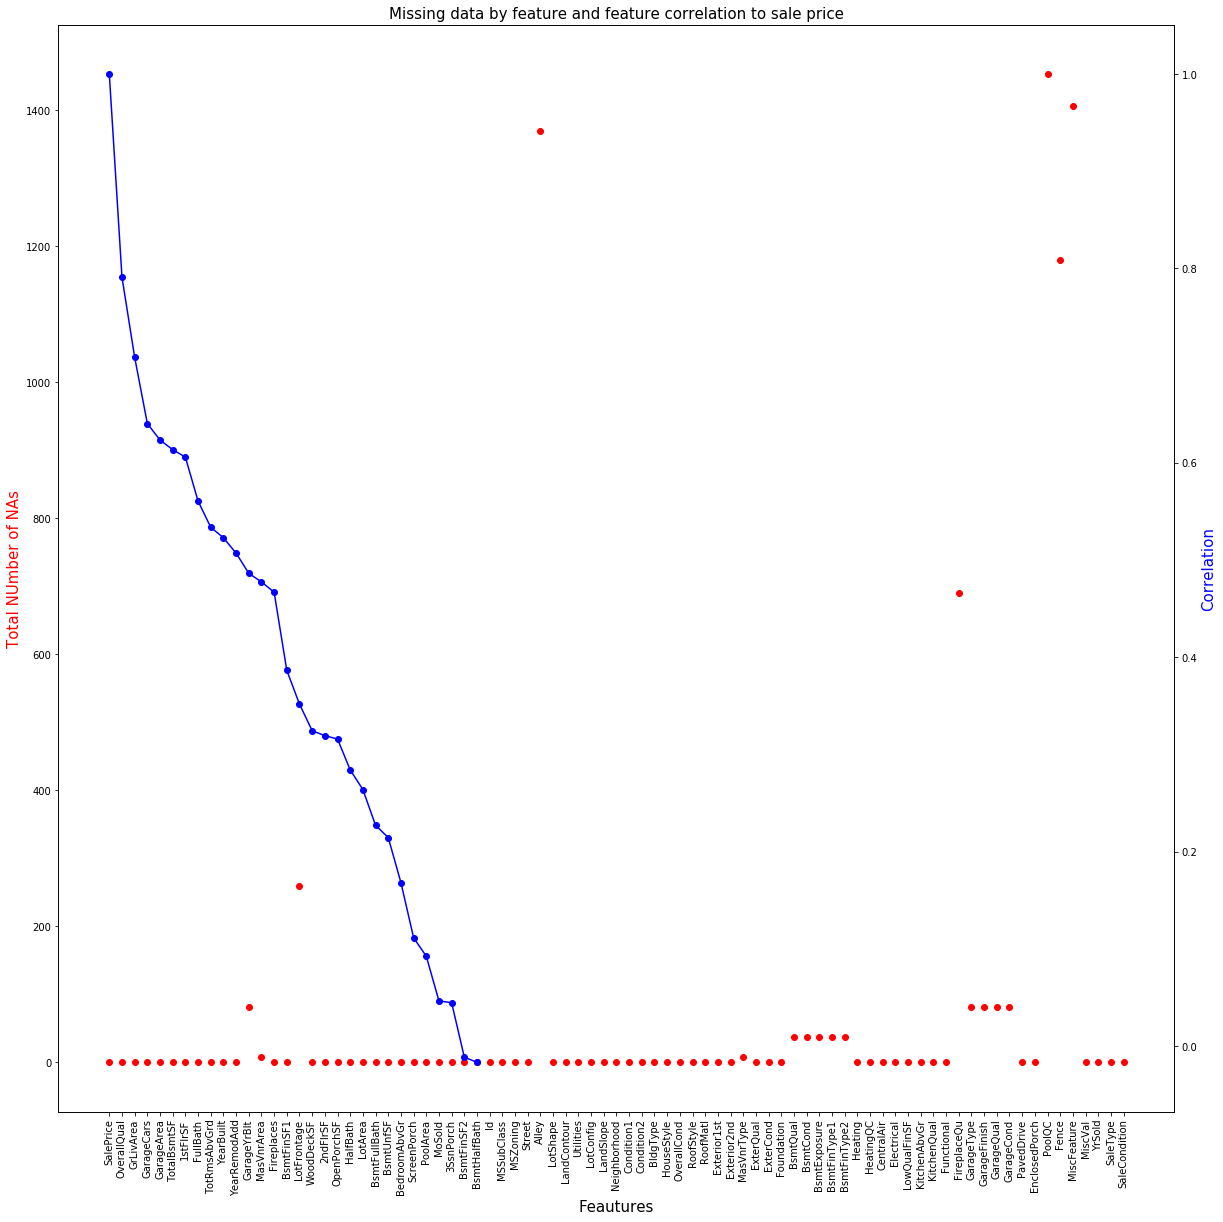

In [117]:
tot = train.isnull().sum()
df = pd.concat([Num,tot],axis=1)
df.columns = ['Correlation', 'TotalNAs']

fig,ax = plt.subplots()
plt.title('Missing data by feature and feature correlation to sale price', fontsize=15)
ax.scatter(df.index, df.TotalNAs,color="red",marker="o")
ax.set_xlabel("Feautures",fontsize=15)
ax.set_ylabel("Total NUmber of NAs",color="red",fontsize=15)
plt.xticks(rotation='90')
ax2=ax.twinx()
ax2.plot(df.index, df.Correlation,color="blue",marker="o")
ax2.set_ylabel("Correlation",color="blue",fontsize=15)
plt.gcf().set_size_inches((20, 20)) 
plt.show()

## Missing Variable Treatment

In [118]:
total = train.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [119]:
total = test.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageCond,78
GarageQual,78
GarageYrBlt,78
GarageFinish,78


Text(0.5, 1.0, 'Missing data by feature')

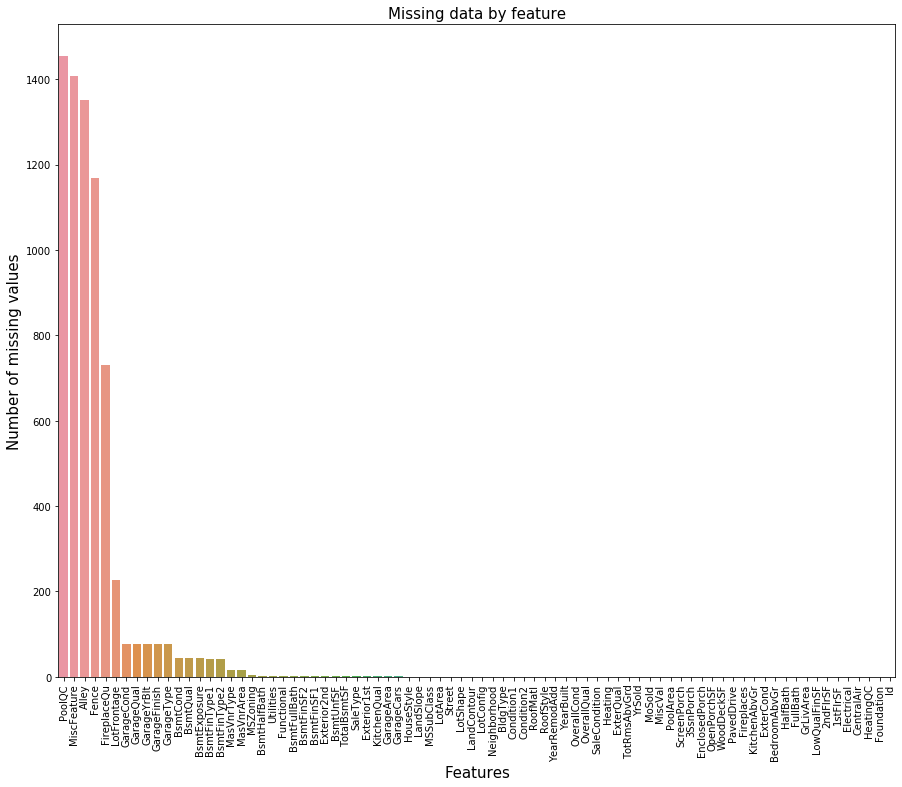

In [120]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=total.index, y=total)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Number of missing values', fontsize=15)
plt.title('Missing data by feature', fontsize=15)

In [121]:
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType'], axis=1 ,inplace=True)
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType'], axis=1 ,inplace=True)

In [122]:
for col in ('LotFrontage','GarageYrBlt','GarageCars','BsmtFinSF1','TotalBsmtSF','GarageArea','BsmtFinSF2','BsmtUnfSF','LotFrontage','GarageYrBlt','BsmtFullBath','BsmtHalfBath'):
    train[col]=train[col].fillna(train[col].mean())
    test[col]=test[col].fillna(test[col].mean())

In [123]:
for col in ('BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrArea', 'Electrical','Exterior2nd','Exterior1st','KitchenQual','Functional','SaleType','Utilities','MSZoning','BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrArea', 'Electrical'):
    test[col]=test[col].fillna(test[col].mode()[0])
    train[col]=train[col].fillna(train[col].mode()[0])

In [124]:
train.isnull().sum().max()

0

In [125]:
test.isnull().sum().max()

0

## Variable Transformation

In [126]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].astype(str)

test['MSSubClass'] = test['MSSubClass'].apply(str)
test['YrSold'] = test['YrSold'].astype(str)

In [127]:
categorial_features_train = train.select_dtypes(include=[np.object])
categorial_features_train.head(2)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,GasA,Ex,Y,SBrkr,Gd,Typ,Y,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,GasA,Ex,Y,SBrkr,TA,Typ,Y,2007,WD,Normal


In [128]:
categorial_features_test = test.select_dtypes(include=[np.object])
categorial_features_test.head(2)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,YrSold,SaleType,SaleCondition
0,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,GasA,TA,Y,SBrkr,TA,Typ,Y,2010,WD,Normal
1,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,GasA,TA,Y,SBrkr,Gd,Typ,Y,2010,WD,Normal


In [129]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in categorial_features_train:
    label_encoders[column] = LabelEncoder()
    train[column] = label_encoders[column].fit_transform(train[column]) 

In [130]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in categorial_features_test:
    label_encoders[column] = LabelEncoder()
    test[column] = label_encoders[column].fit_transform(test[column]) 